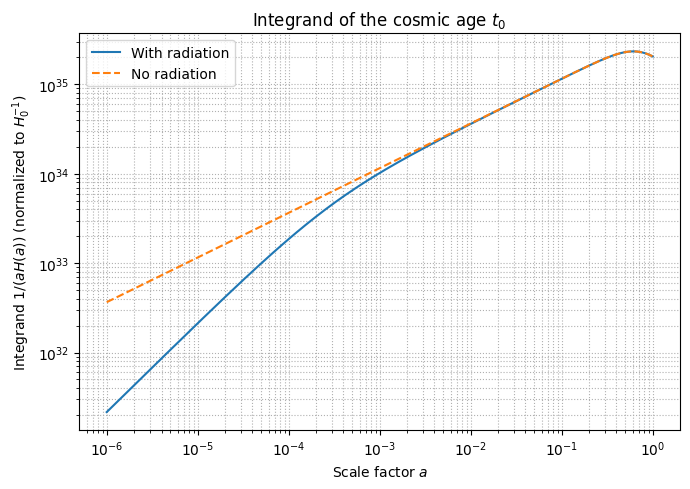

In [1]:
# =============================
# 1️⃣ Setup and constants
# =============================
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Updated 2025 SFT baseline constants
H0_km = 68.05                              # km/s/Mpc
H0 = H0_km * 1000 / (3.085677581e22)       # s^-1
c = 2.99792458e8                           # m/s
G = 6.67430e-11                            # m^3/kg/s^2
M_m = 9.74010e53                           # kg
R_c = 1.44663e27                           # m
R_0 = 4.39448e26                           # m
Omega_m0 = 0.31500
Omega_r0 = 9.03400e-5
Omega_DE0 = 0.68491
rho_DE0 = 5.95765e-27                      # kg/m^3

# =============================
# 2️⃣ Define H(a)
# =============================
def H_LCDM(a):
    """Standard H(a) including radiation and dark energy."""
    return H0 * np.sqrt(Omega_m0*a**-3 + Omega_r0*a**-4 + Omega_DE0)

# =============================
# 3️⃣ Compute integrand curves
# =============================
a_vals = np.logspace(-6, 0, 500)
integrand_with_r = 1 / (a_vals * H_LCDM(a_vals))
integrand_no_r = 1 / (a_vals * (H0 * np.sqrt(Omega_m0*a_vals**-3 + Omega_DE0)))

# =============================
# 4️⃣ Plot Figure A1
# =============================
plt.figure(figsize=(7,5))
plt.loglog(a_vals, integrand_with_r/H0, label="With radiation")
plt.loglog(a_vals, integrand_no_r/H0, '--', label="No radiation")
plt.xlabel("Scale factor $a$")
plt.ylabel(r"Integrand $1/(aH(a))$ (normalized to $H_0^{-1}$)")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.title("Integrand of the cosmic age $t_0$")
plt.tight_layout()
plt.show()
